In [ ]:
# Authors: Julia Macuga, Paulina Dąbrowska

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
path = "../out/mushrooms/random_forest_classifier.csv"
df = pd.read_csv(path)

In [17]:
small_forest = df[(df["n_trees"] >= 10) & (df["n_trees"] <= 50)].round(2)
big_forest = df[(df["n_trees"] >= 100) & (df["n_trees"] <= 500)].round(2)

## Save plots

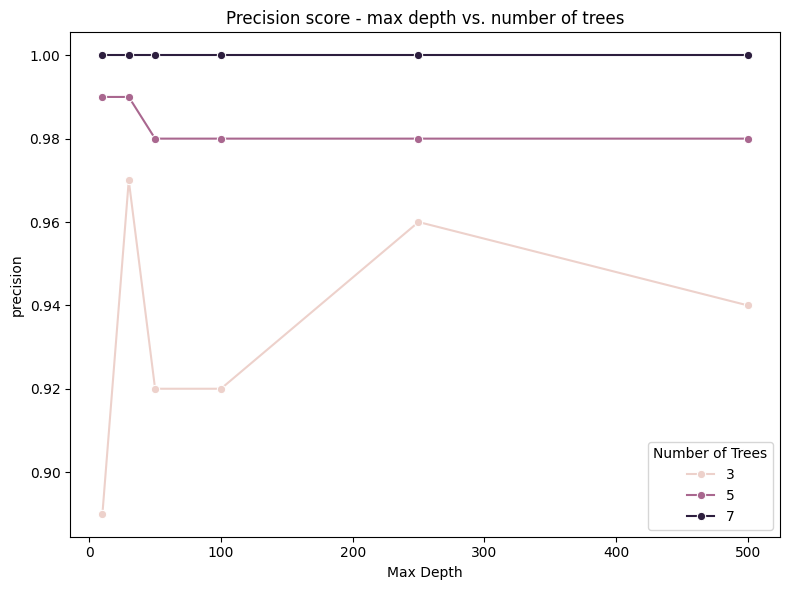

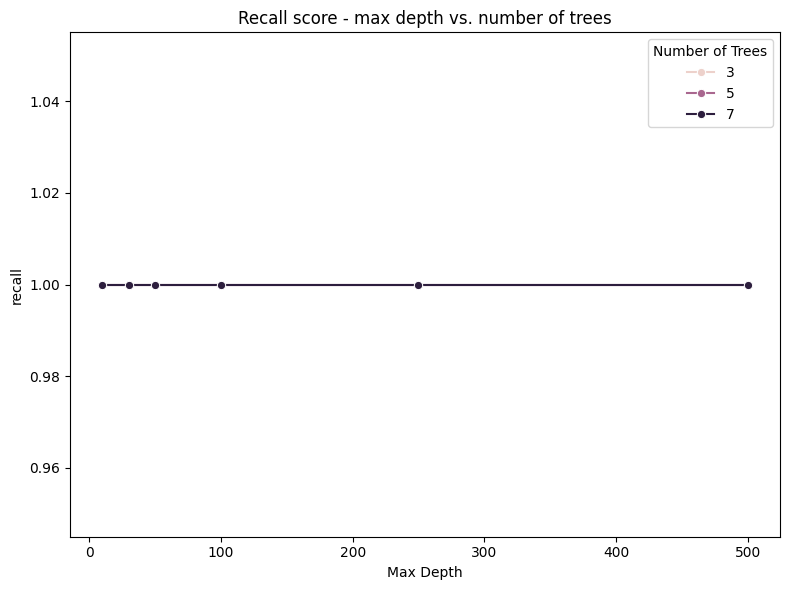

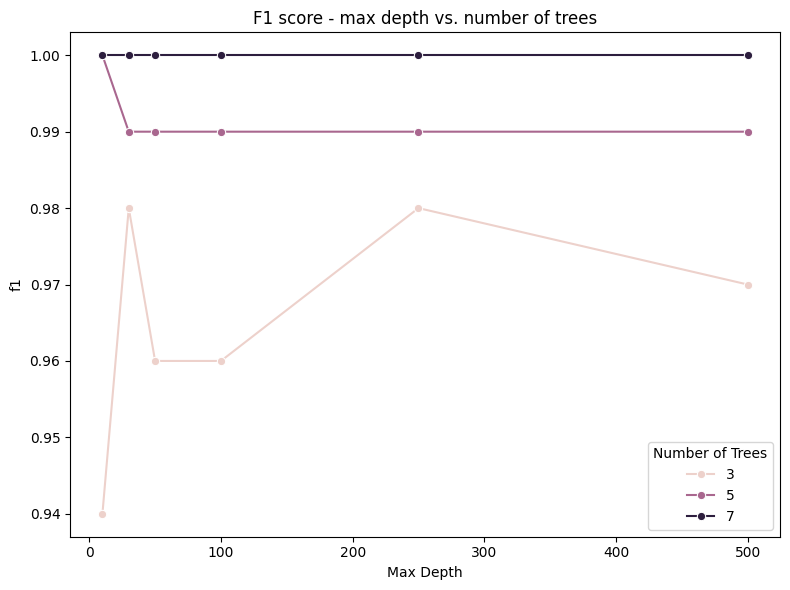

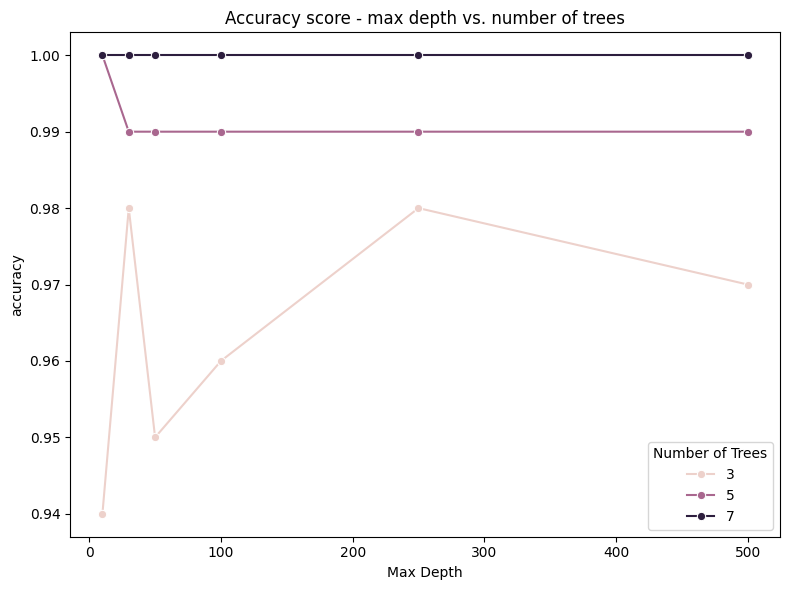

In [27]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for score, label in zip(scores, labels): 
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    #  = plt.plot( figsize=(8, 6))

    sns.lineplot(ax=ax, data=df.round(2), x="n_trees", y=score, hue="max_depth", marker="o")
    ax.set_title(f"{label} score - max depth vs. number of trees")
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel(score)
    ax.legend(title="Max Depth")

    plt.tight_layout()
    plt.savefig(f"../out/mushrooms/random_forest_classifier_{score}.png")

In [20]:
path = "../out/mushrooms/tournament_forest_classifier.csv"
df = pd.read_csv(path)

In [22]:

tournament_sizes = [3, 5, 7]

for t_size in tournament_sizes:
    tournamnet_df= df[df["tournament_size"] == t_size].round(2)

    table = tournamnet_df.pivot_table(index='max_depth', columns='n_trees', values=['accuracy'])
    print(table)
    

          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.84  0.88  0.89  0.77  0.89  0.89
5             0.84  0.87  0.89  0.89  0.89  0.90
7             0.88  0.90  0.90  0.90  0.90  0.90
          accuracy                            
n_trees        10    30    50    100  250  500
max_depth                                     
3             0.71  0.87  0.90  0.89  0.9  0.9
5             0.80  0.90  0.90  0.91  0.9  0.9
7             0.81  0.90  0.89  0.91  0.9  0.9
          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.90  0.79  0.90  0.88  0.89  0.89
5             0.85  0.90  0.88  0.89  0.90  0.90
7             0.81  0.91  0.92  0.90  0.90  0.90


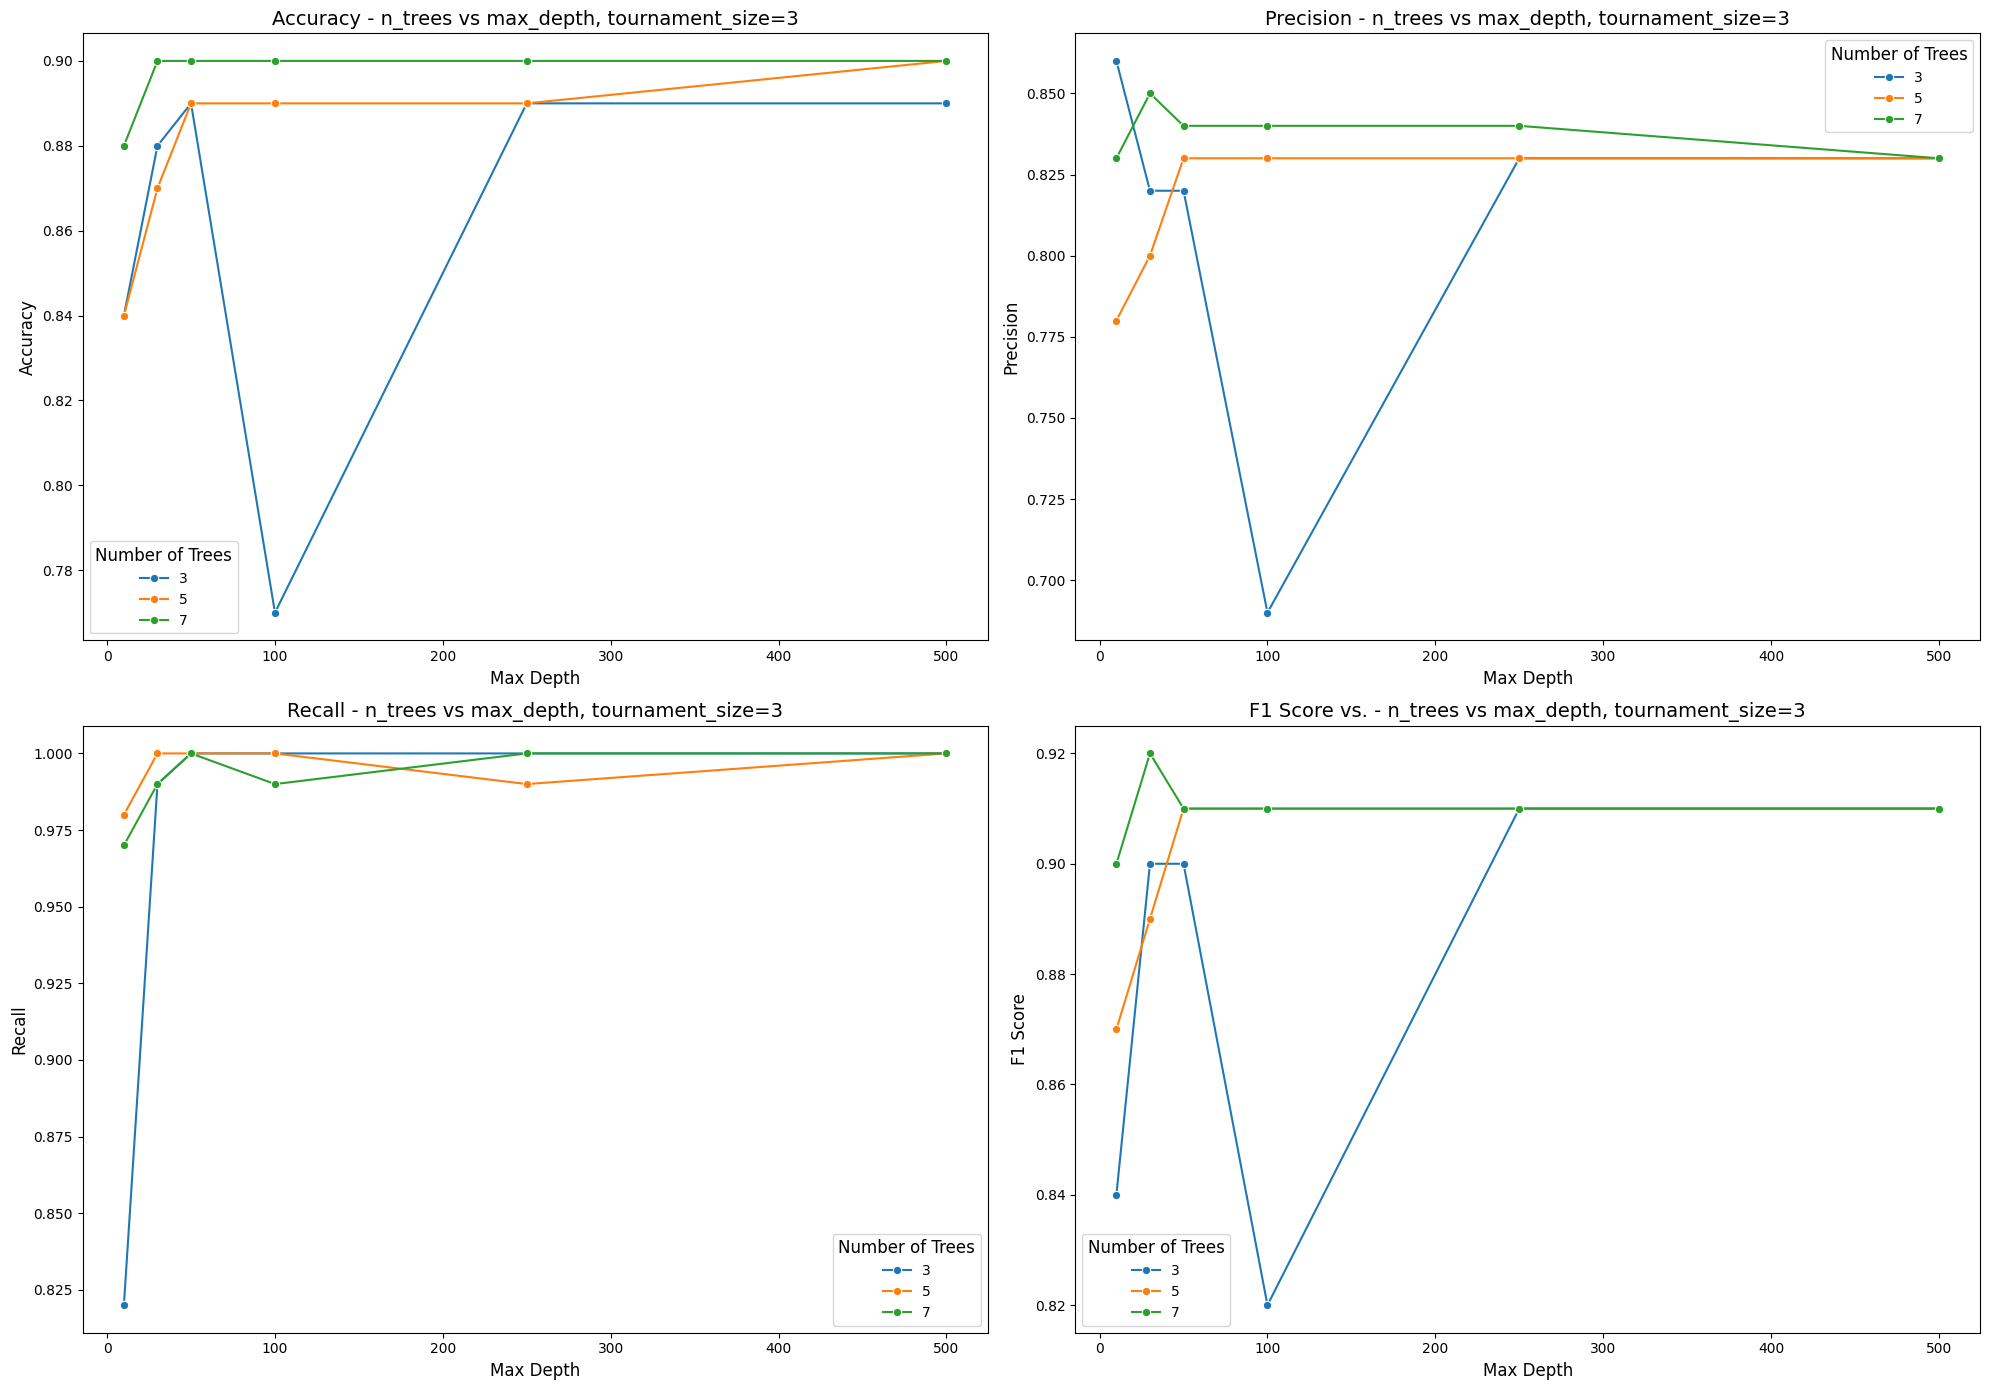

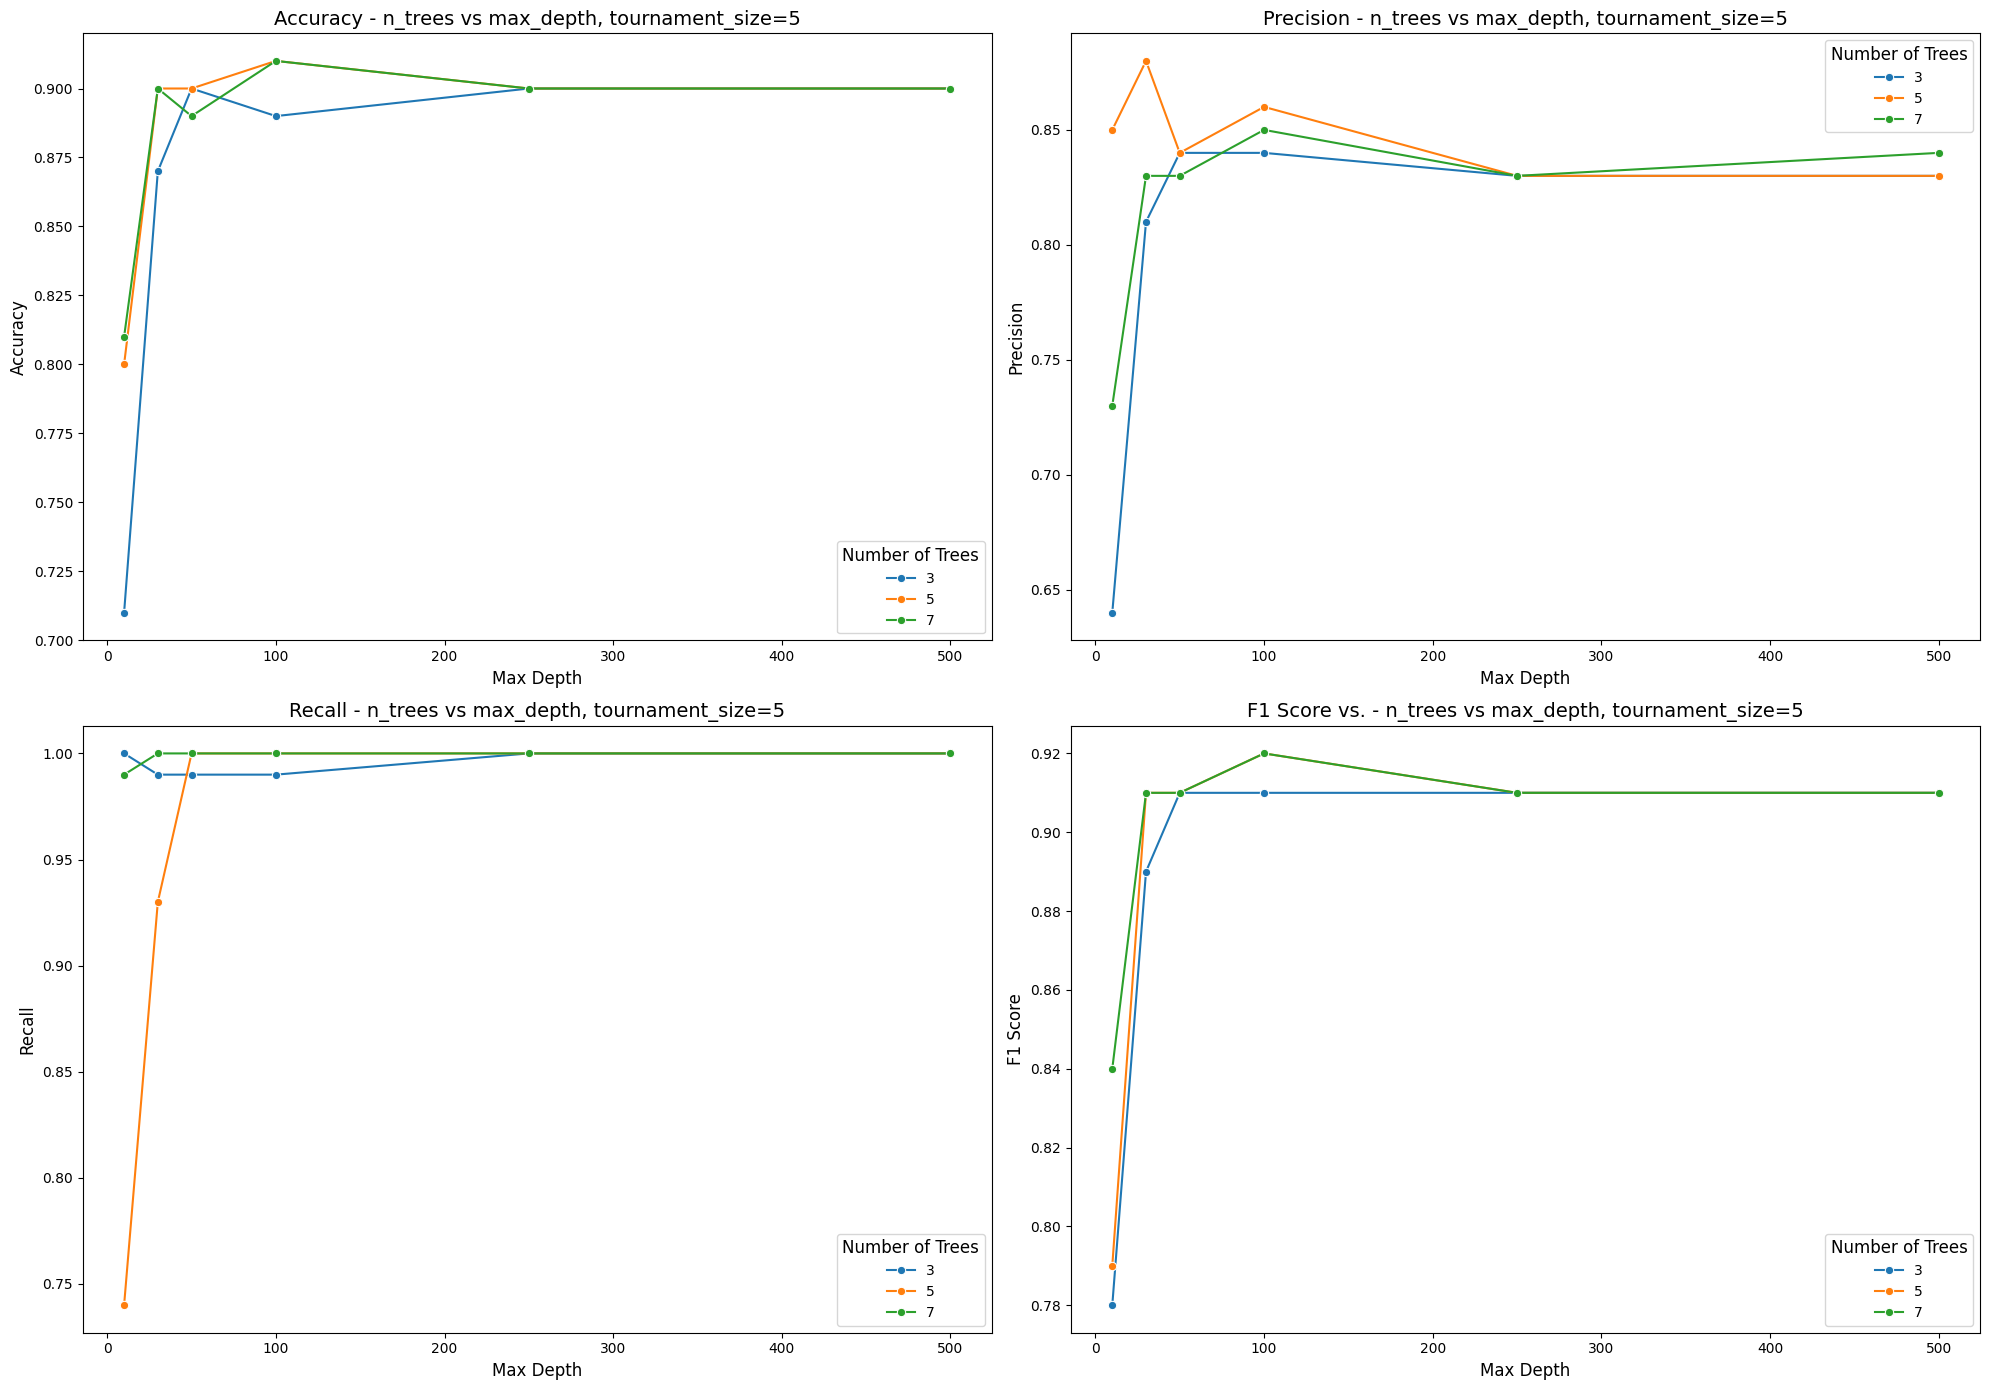

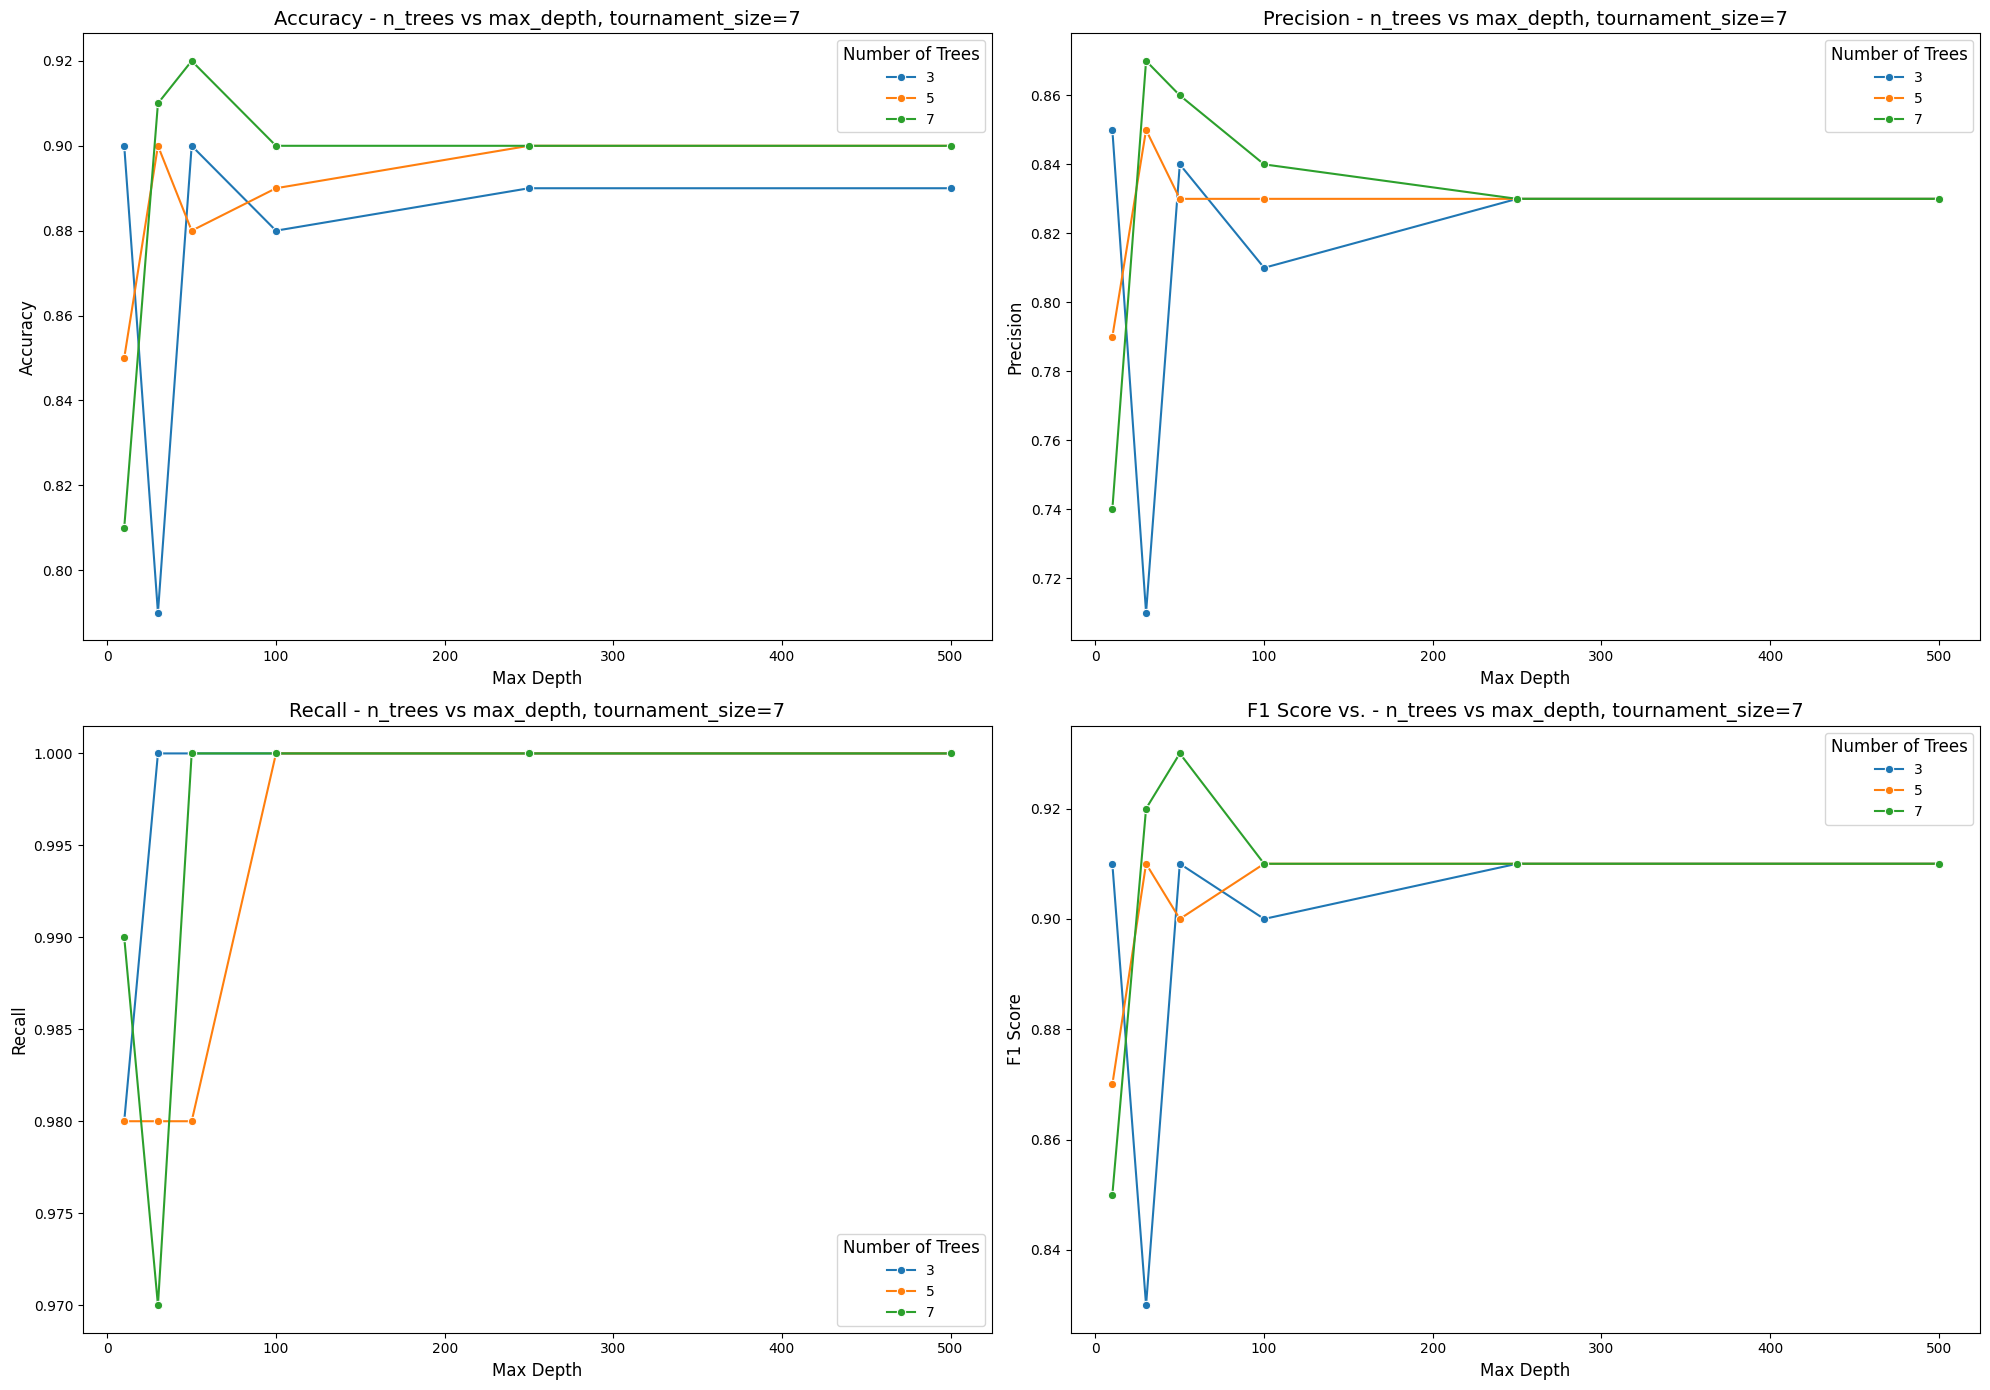

In [33]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for tournament in tournament_sizes:
    tournament_df = df[df["tournament_size"] == tournament].round(2)
    # Create the figure and axes with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Accuracy plot
    sns.lineplot(ax=axes[0, 0], data=tournament_df, x='n_trees', y='accuracy', hue='max_depth', marker='o', palette='tab10')
    axes[0, 0].set_title(f'Accuracy - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[0, 0].set_xlabel('Number of Trees', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # Precision plot
    sns.lineplot(ax=axes[0, 1], data=tournament_df, x='n_trees', y='precision', hue='max_depth', marker='o', palette='tab10')
    axes[0, 1].set_title(f'Precision - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[0, 1].set_xlabel('Number of Trees', fontsize=12)
    axes[0, 1].set_ylabel('Precision', fontsize=12)
    axes[0, 1].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # Recall plot
    sns.lineplot(ax=axes[1, 0], data=tournament_df, x='n_trees', y='recall', hue='max_depth', marker='o', palette='tab10')
    axes[1, 0].set_title(f'Recall - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[1, 0].set_xlabel('Number of Trees', fontsize=12)
    axes[1, 0].set_ylabel('Recall', fontsize=12)
    axes[1, 0].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # F1 Score plot
    sns.lineplot(ax=axes[1, 1], data=tournament_df, x='n_trees', y='f1', hue='max_depth', marker='o', palette='tab10')
    axes[1, 1].set_title(f'F1 Score vs. - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[1, 1].set_xlabel('Number of Trees', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    plt.savefig(f"../out/mushrooms/tournament_{tournament}.png")
    plt.tight_layout()